In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-factors/diabetes-vid.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read dataset

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-factors/diabetes-vid.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [4]:
def dataset_info(data):
    print('*'*30,'About the dataset :','*'*20)
    print()
    print()
    print('Number of rows :',data.shape[0])
    print('Number of columns :',data.shape[1])
    print()
    print('*'*80)
    print(data.info())
    print()
    print('*'*80)
    print('Missing values :')
    print()
    print(data.isna().sum())
    print()
    print('*'*80)
    print('NUmber of duplicates :',data.duplicated().sum())
    print()
    print('*'*80)
    print('variables =',[i for i in df.columns])
    print()
    print('*'*80)
    print('Target variable : ')
    print(data['Outcome'].value_counts())

In [5]:
dataset_info(df)

****************************** About the dataset : ********************


Number of rows : 768
Number of columns : 9

********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None

***********************

In [6]:
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
num_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cat_col = ['Outcome']

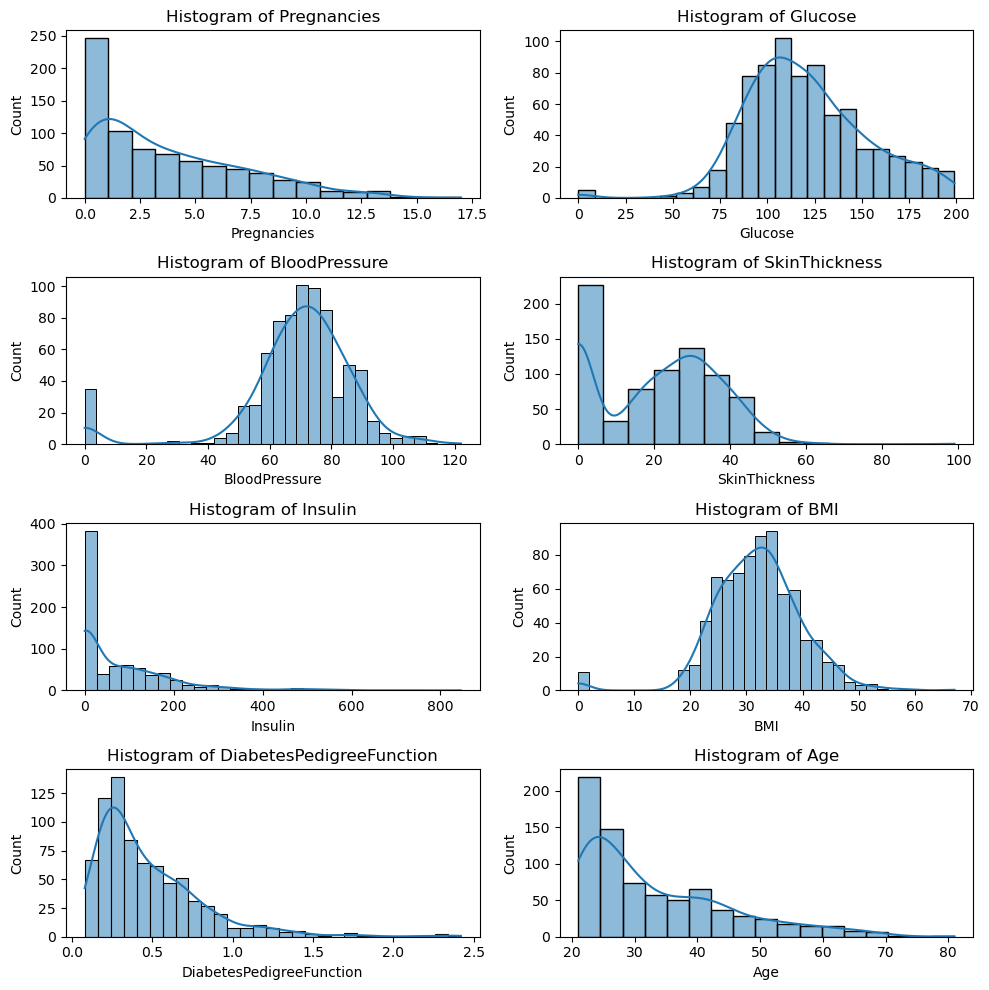

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))

n = 0

for i in num_col:
    sns.histplot(data=df, x=i, kde=True, ax=ax[n//2, n%2])
    
    ax[n//2, n%2].set_title(f'Histogram of {i}')
    
    n += 1

plt.tight_layout()
plt.show()

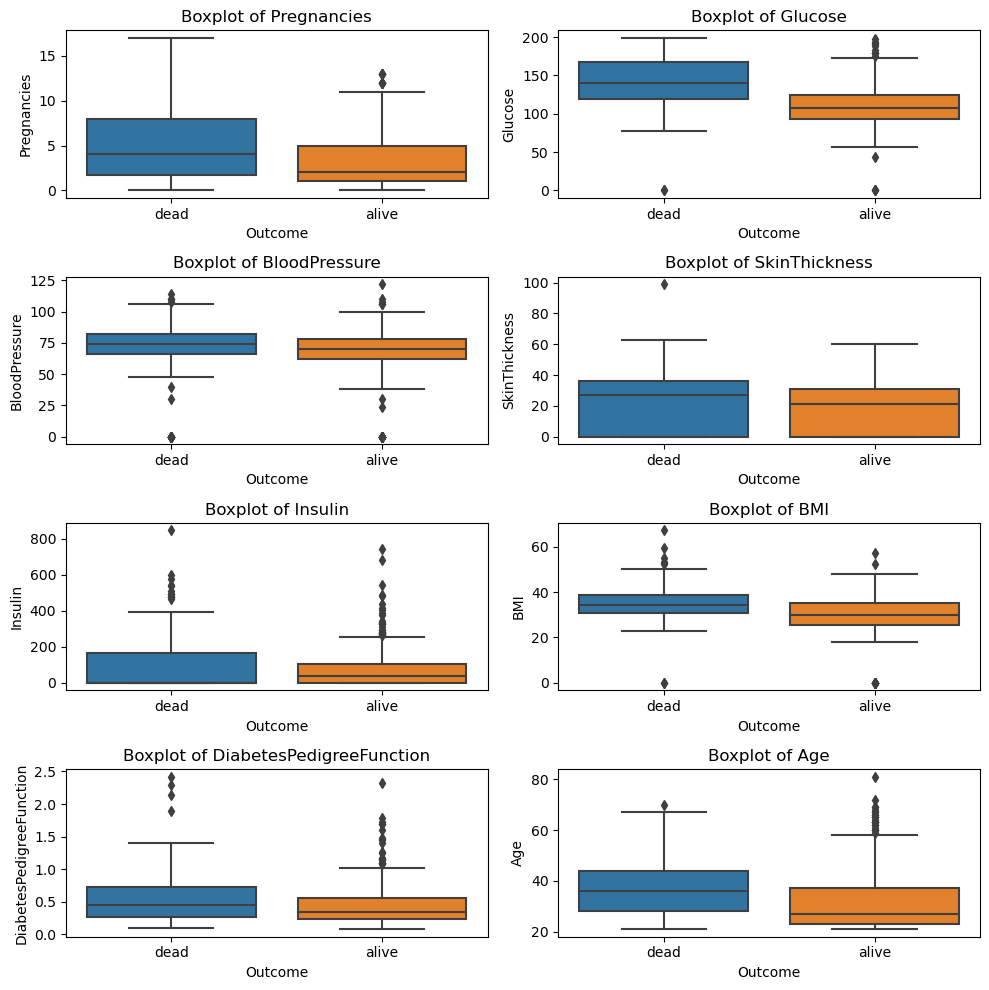

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))

n = 0

for i in num_col:
    sns.boxplot(data=df, x='Outcome',y=i, ax=ax[n//2, n%2])
    
    ax[n//2, n%2].set_title(f'Boxplot of {i}')
    
    n += 1

plt.tight_layout()
plt.show()

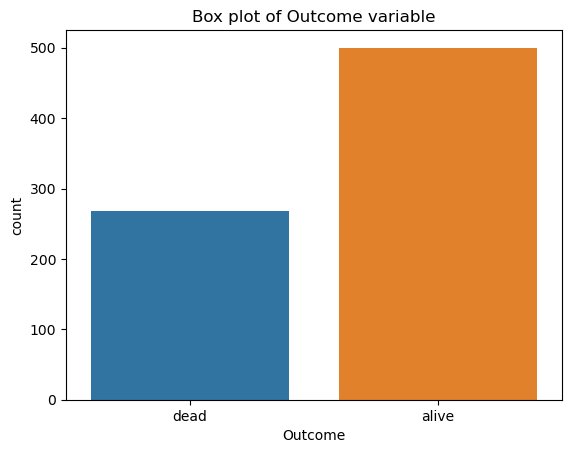

In [9]:
sns.countplot(data=df,x='Outcome')
plt.title('Box plot of Outcome variable')
plt.show()

In [10]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

Balanced the dataset

In [11]:
smote = SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y,)

In [12]:
std = StandardScaler()

In [13]:
X_train,X_test,y_train,y_test = train_test_split(std.fit_transform(X_resampled),y_resampled,test_size=0.2,random_state=123)

In [14]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

In [15]:
def model_info(model):
    print()
    print(f'For {model}')
    print()
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    cla_repo_train = classification_report(y_train,y_pred_train)
    conf_mat_train = confusion_matrix(y_train,y_pred_train)
    
    cla_repo_test = classification_report(y_test,y_pred_test)
    conf_mat_test = confusion_matrix(y_test,y_pred_test)
    
    print('Classification report (Train):')
    print()
    print(cla_repo_train)
    print()
    print('Classification report (Test):')
    print()
    print(cla_repo_test)
    print()  
    print('*'*80)
    print('Confusion metrix (Train):')
    print()
    print(conf_mat_train)
    print()
    print('Confusion metrix (Test):')
    print()
    print(conf_mat_test)
    print()
    print('*'*80)
    print('*'*80)
    print('*'*80)

In [16]:
models = [lr,dt,rf,svc]

for model in models:
    model_info(model)


For LogisticRegression()

Classification report (Train):

              precision    recall  f1-score   support

       alive       0.75      0.80      0.78       402
        dead       0.79      0.73      0.76       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800


Classification report (Test):

              precision    recall  f1-score   support

       alive       0.74      0.65      0.70        98
        dead       0.70      0.78      0.74       102

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200


********************************************************************************
Confusion metrix (Train):

[[323  79]
 [108 290]]

Confusion metrix (Test):

[[64 34]
 [22 80]]

****************************************************************************